## Imports and getting the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic = pd.read_csv('train.csv')

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## EDA

<AxesSubplot:xlabel='Pclass', ylabel='count'>

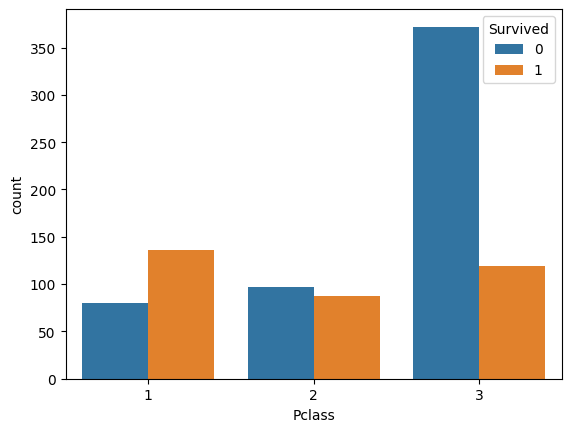

In [7]:
sns.countplot(x='Pclass', data=titanic, hue='Survived')
# looks alike most of the 3rd class did not survive, however 1st and 2nd class is quite evenly distributed

<AxesSubplot:xlabel='Sex', ylabel='count'>

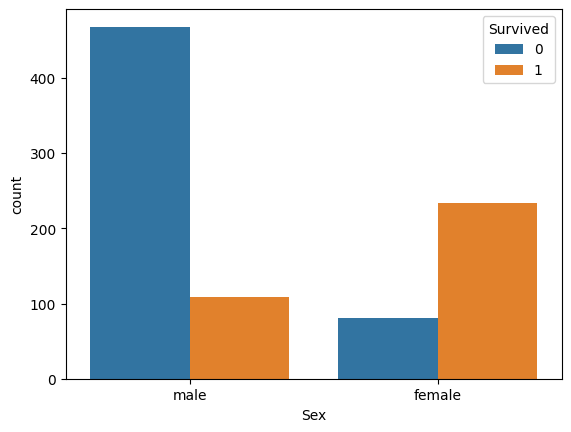

In [8]:
sns.countplot(x='Sex', data=titanic, hue='Survived')
# much bigger number of females (approx. twice the size) survived 

<AxesSubplot:xlabel='SibSp', ylabel='count'>

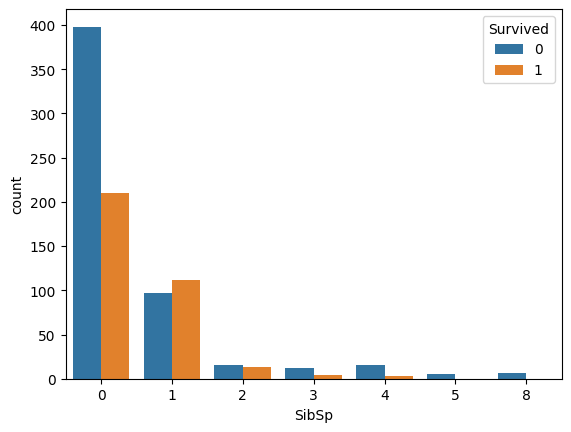

In [9]:
sns.countplot(x='SibSp', data=titanic, hue='Survived')
# actually more people with 1 sibling/spouse did survive

<AxesSubplot:xlabel='Fare', ylabel='Count'>

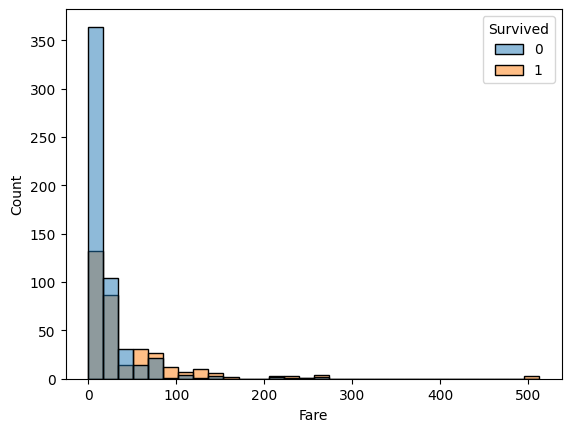

In [20]:
sns.histplot(x='Fare', data=titanic, hue='Survived', bins=30)

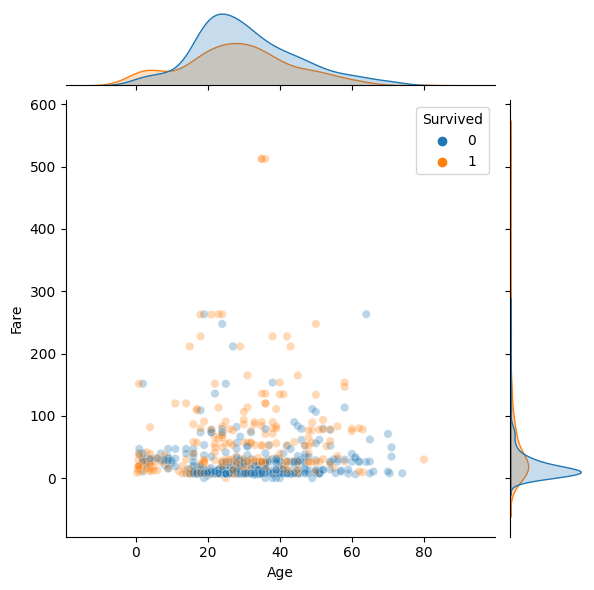

In [37]:
sns.jointplot(x='Age', y='Fare', data=titanic, hue='Survived', alpha=0.3)
#higher the fare, higher the survavibilty?

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

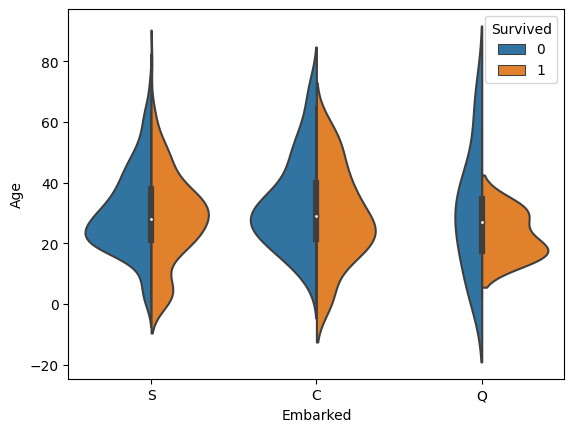

In [36]:
sns.violinplot(x='Embarked', y='Age', data=titanic, hue='Survived', split=True)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

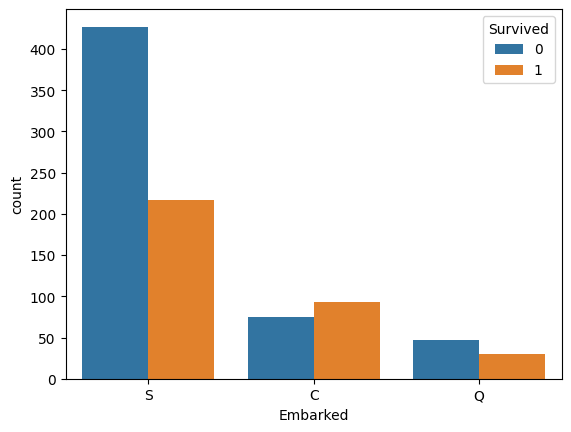

In [40]:
sns.countplot(x='Embarked', data=titanic, hue='Survived')

/var/folders/q2/8ff21qsd0v9g8zx38dnmsvd40000gn/T/ipykernel_10834/770287526.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = titanic.corr()


<AxesSubplot:>

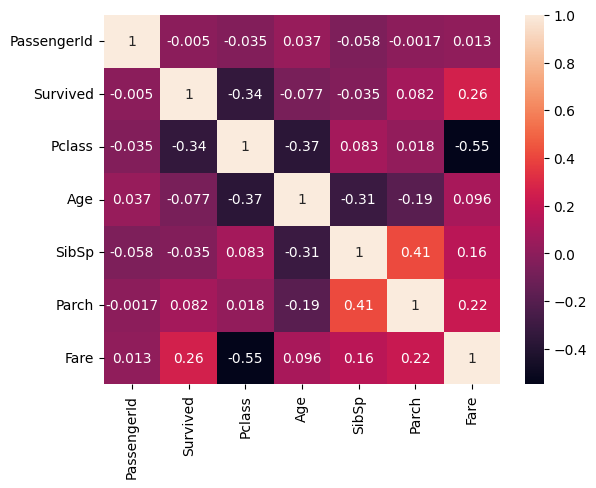

In [42]:
corr = titanic.corr()
sns.heatmap(corr, annot=True)

<AxesSubplot:xlabel='Parch', ylabel='count'>

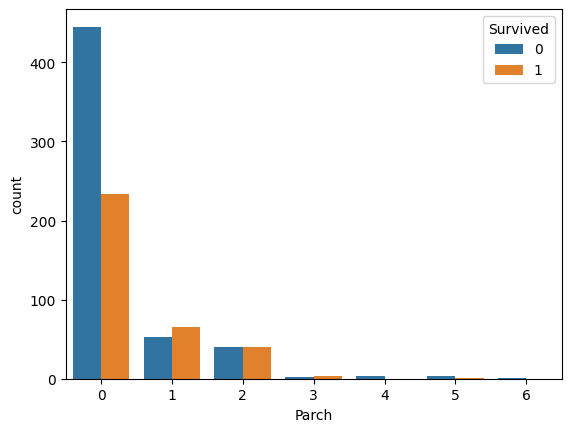

In [44]:
sns.countplot(x='Parch', data=titanic, hue='Survived')

In [95]:
def title(name):
    for part in name.split():
        if '.' in part:
            return part

titanic['Title'] = titanic['Name'].apply(lambda x: title(x))

titanic.drop('Name', axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,Rev.
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,Miss.
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,Mr.


In [80]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


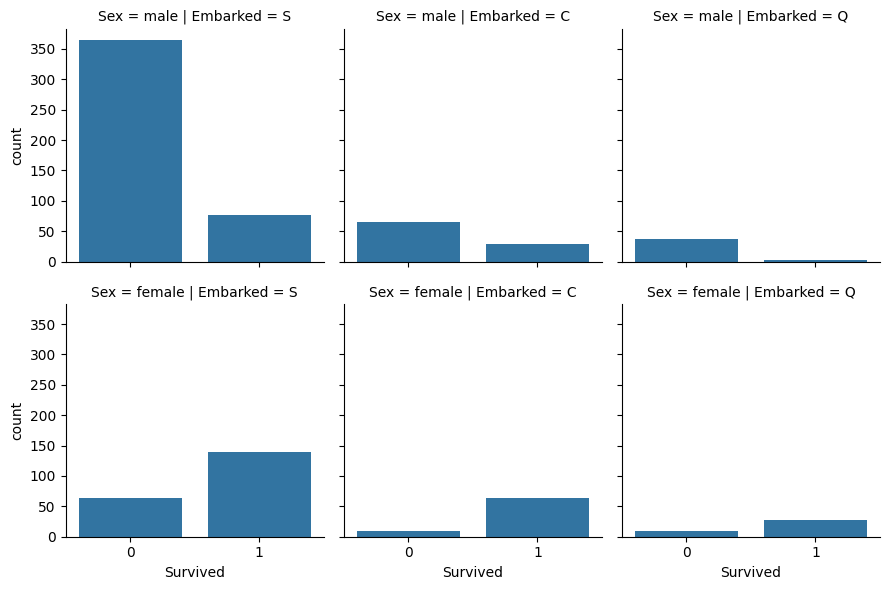

In [94]:
g = sns.FacetGrid(data=titanic, col='Embarked', row='Sex')
g.map(sns.countplot, 'Survived')

#g = sns.FacetGrid(data=tips, col='time', row='smoker')
#g.map(sns.histplot, 'total_bill', kde=True)

In [96]:
titanic['Ticket_len'] = titanic['Ticket'].apply(lambda x: len(x))

In [97]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_len
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,9
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,8
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,16
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,6
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,6


In [98]:
corr = titanic.corr()

/var/folders/q2/8ff21qsd0v9g8zx38dnmsvd40000gn/T/ipykernel_10834/3697405193.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = titanic.corr()


<AxesSubplot:>

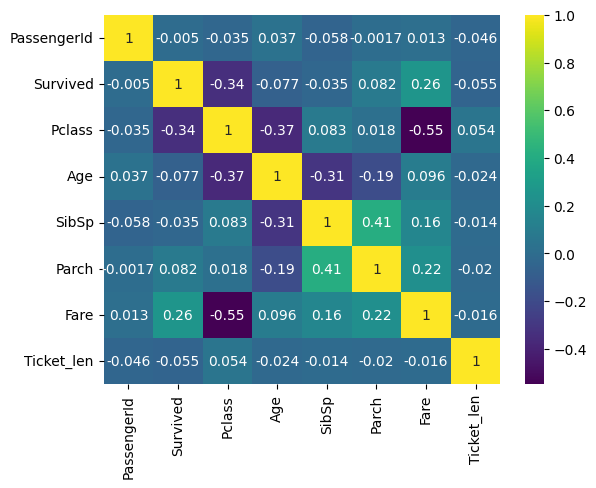

In [103]:
sns.heatmap(corr, annot=True, cmap='viridis')

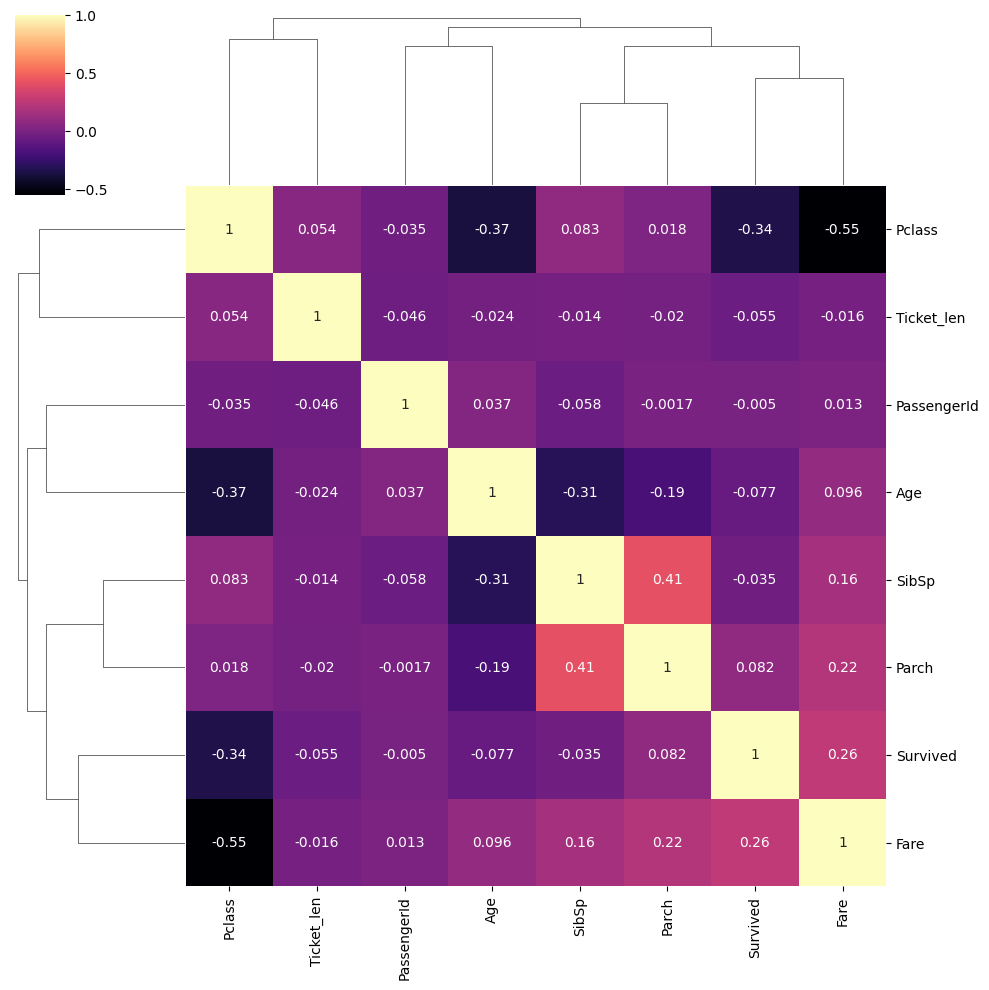

In [108]:
sns.clustermap(corr, annot=True, cmap='magma')

In [109]:
titanic['Family size'] = titanic['Parch'] + titanic['SibSp']

<AxesSubplot:xlabel='Family size', ylabel='count'>

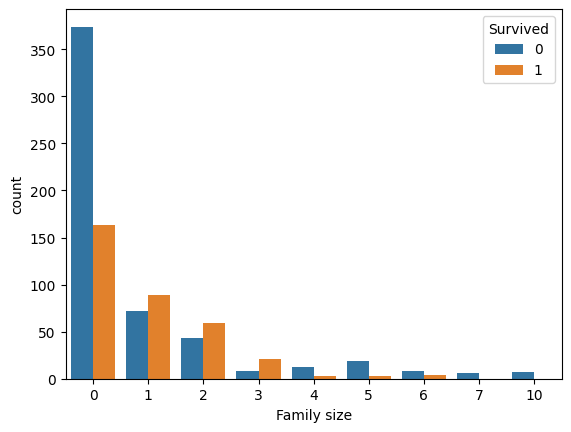

In [116]:
sns.countplot(x='Family size', data=titanic, hue='Survived')

In [117]:
corr = titanic.corr()

/var/folders/q2/8ff21qsd0v9g8zx38dnmsvd40000gn/T/ipykernel_10834/3697405193.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = titanic.corr()


In [123]:
titanic['Fare per family member'] = titanic['Fare'] / (titanic['Family size']+1)

In [124]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket_len,Family size,Fare per family member
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,9,1,3.62500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,8,1,35.64165
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,16,0,7.92500
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,6,1,26.55000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,6,0,8.05000


In [125]:
corr = titanic.corr()

/var/folders/q2/8ff21qsd0v9g8zx38dnmsvd40000gn/T/ipykernel_10834/3697405193.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = titanic.corr()


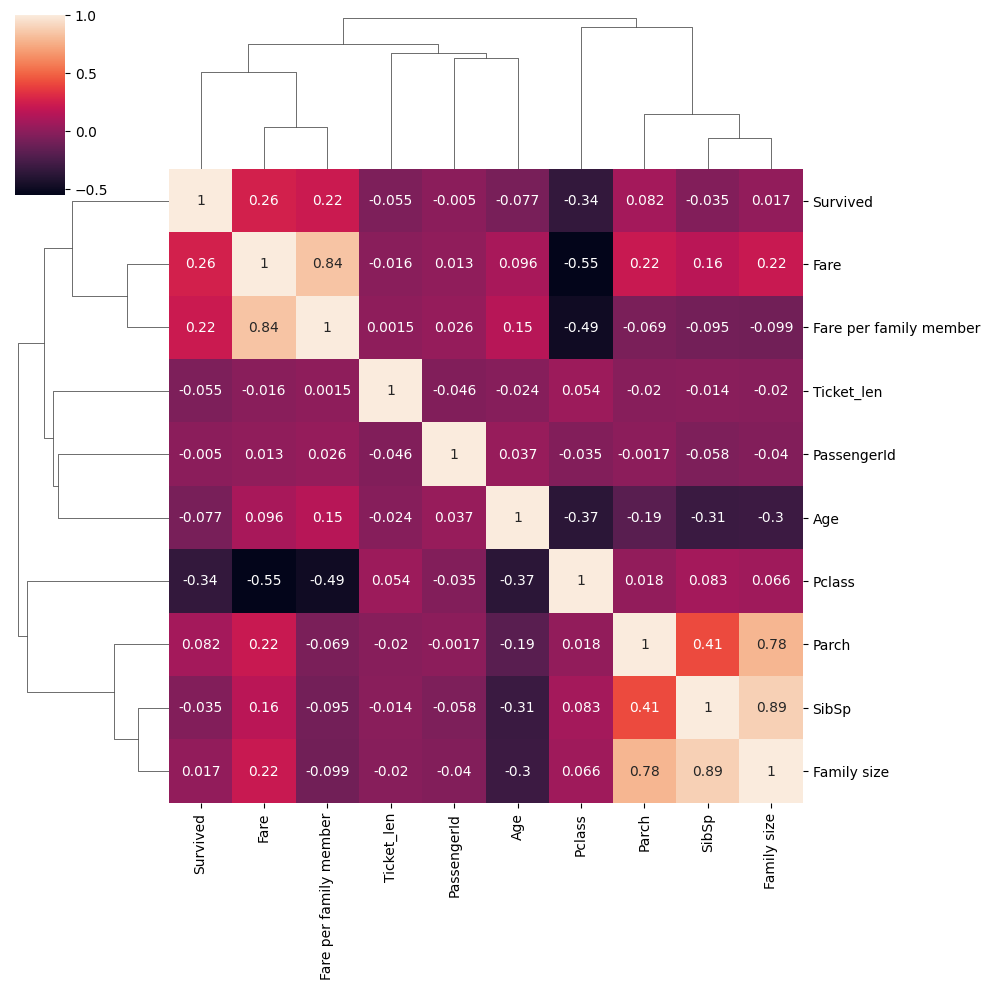

In [126]:
sns.clustermap(corr, annot=True)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

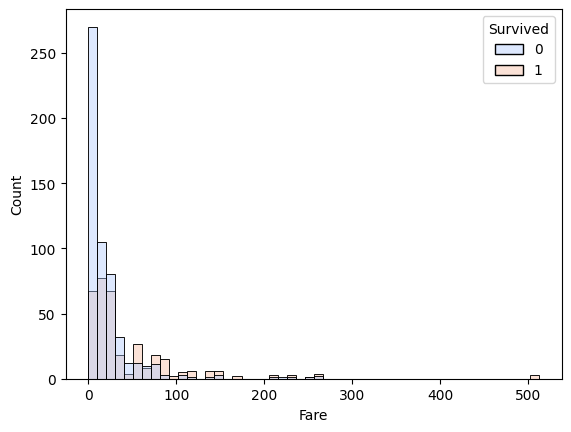

In [147]:
sns.histplot(x='Fare', bins=50, hue='Survived', data=titanic, alpha=0.4, palette='coolwarm')

In [145]:
titanic[titanic['Fare']>300]['Survived'].value_counts()

1    3
Name: Survived, dtype: int64

In [148]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_len,Family size,Fare per family member
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,6.750842,0.904602,19.916375
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,2.745515,1.613459,35.841257
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,5.000000,0.000000,7.250000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,6.000000,0.000000,8.300000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,7.000000,1.000000,23.666667
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,18.000000,10.000000,512.329200


In [150]:
titanic.groupby('Sex')['Title'].value_counts()

Sex     Title    
female  Miss.        182
        Mrs.         125
        Mlle.          2
        Countess.      1
        Dr.            1
        Lady.          1
        Mme.           1
        Ms.            1
male    Mr.          517
        Master.       40
        Dr.            6
        Rev.           6
        Col.           2
        Major.         2
        Capt.          1
        Don.           1
        Jonkheer.      1
        Sir.           1
Name: Title, dtype: int64